# Time Series Practice Case
# Firli Ilhami

## Deskripsi Data
Berisi data penjualan untuk perusahaan kecil selama triwulanan selama periode 1981-2005. <br>
Pada latihan kali ini akan difokuskan pada data 'Sales' saja.

In [342]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [343]:
df=pd.read_csv('tute1.csv',delimiter=',')

In [344]:
df.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [345]:
df.columns=['Date','Sales','AdBudget','GDP']

In [346]:
df.head()

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [348]:
year=[]
month=[]
for i in df['Date']:
    y=i.split('-')[1]
    month.append(i.split('-')[0])
    if y[0]!='0':
        year.append('19'+y)
    else:
        year.append('20'+y)
    

In [349]:
#Format Date Year/date/month
df['Date']=pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year,month)])
df.set_index('Date',inplace=True)

In [350]:
df.drop(['AdBudget','GDP'],axis=1,inplace=True)


Text(0.5,1,'Data Penjualan per 3 bulan pada periode 1981-2005')

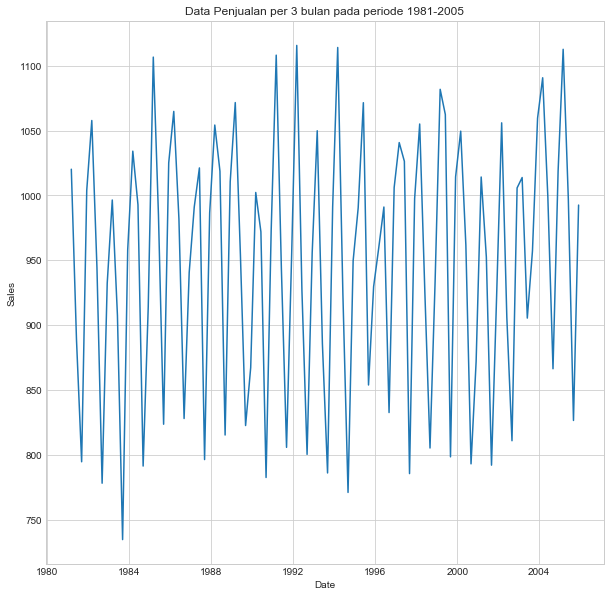

In [351]:
plt.figure(figsize=(10,10))
plt.plot(df.Sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Data Penjualan per 3 bulan pada periode 1981-2005')

In [352]:
#Determining rolling statistics
rolmean=df['Sales'].rolling(window=4).mean()
rolstd=df['Sales'].rolling(window=4).std()
print(rolmean,rolstd)

Date
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01     927.075
1982-03-01     936.450
1982-06-01     950.250
1982-09-01     946.125
1982-12-01     928.275
1983-03-01     912.975
1983-06-01     903.800
1983-09-01     892.950
1983-12-01     899.350
1984-03-01     908.750
1984-06-01     930.025
1984-09-01     944.175
1984-12-01     933.200
1985-03-01     951.300
1985-06-01     949.375
1985-09-01     957.425
1985-12-01     985.150
1986-03-01     974.700
1986-06-01     973.900
1986-09-01     975.000
1986-12-01     953.900
1987-03-01     935.500
1987-06-01     945.325
1987-09-01     937.425
1987-12-01     948.900
1988-03-01     964.675
1988-06-01     964.050
                ...   
1998-09-01     945.950
1998-12-01     930.075
1999-03-01     936.750
1999-06-01     970.925
1999-09-01     969.225
1999-12-01     989.275
2000-03-01     981.225
2000-06-01     956.075
2000-09-01     954.725
2000-12-01     919.225
2001-03-01     910.400
2001-06-01     908.125
2001-0

## Plot Rolling Statistics
Secara visual dari Plot Rolling, data sudah stasioner dalam ragam maupun dalam rataan sehingga data tidak perlu ditransformasi terlebih dahulu sebelum menggunakan model ARIMA. Namun akan dilakukan Dickey-Fuller Test untuk memastikannya lebih lanjut

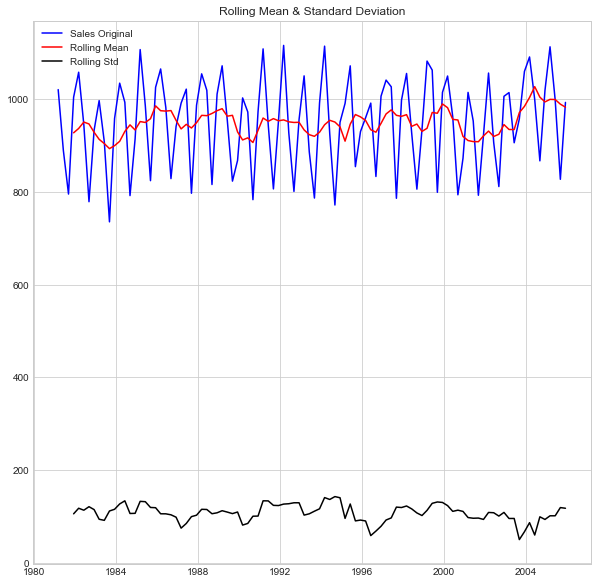

In [353]:
plt.figure(figsize=(10,10))
orig=plt.plot(df,color='blue',label='Sales Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Dickey-Fuller test
Jika dilihat nilai p-value yaitu 0.016628 < 0.05 <br>
artinya bahwa h0 ditolak yaitu menolak bahwa data tidak stasioner <br>
sehingga datanya adalah data stasioner


In [354]:
#Perform Dickey-FUller test:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test: ')
dftest=adfuller(indexdf['Sales'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statisctik','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
    
print (dfoutput)

Result of Dickey-Fuller Test: 
Test Statisctik                -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


## ACF and PACF plots
Dengan melihat plot ACF dan PACF, akan membantu kita dalam menentukan nilai parameter pada model ARIMA yang akan kita buat nantinya

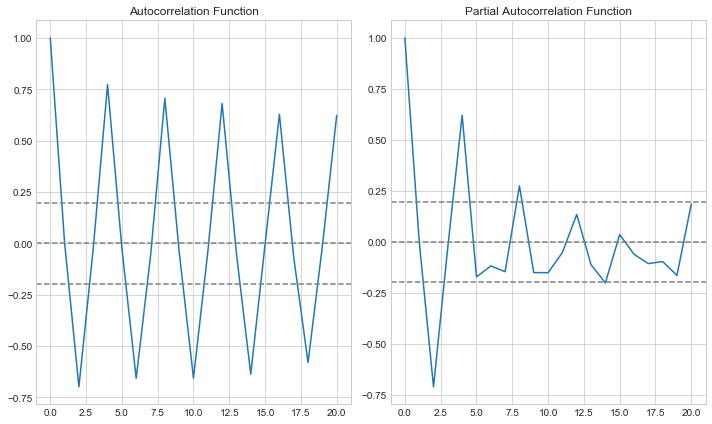

In [355]:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexdf, nlags=20)
lag_pacf = pacf(indexdf, nlags=20, method='ols')


#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexdf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexdf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexdf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexdf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [356]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

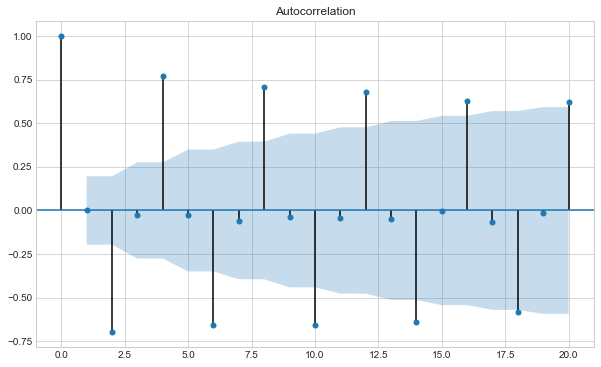

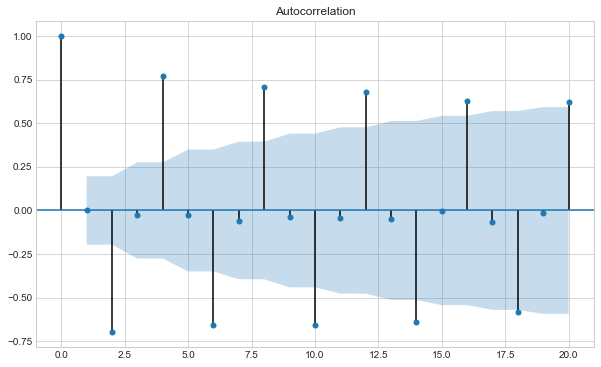

In [357]:
plot_acf(df,lags=20)

Dari plot acf bisa menentukan nilai parameter q (moving average) pada model ARIMA. <br> 
Pada plot acf di atas terlihat bahwa plot acf menunjukkan tell-off sehingga  nilai untuk parameter q adalah 0

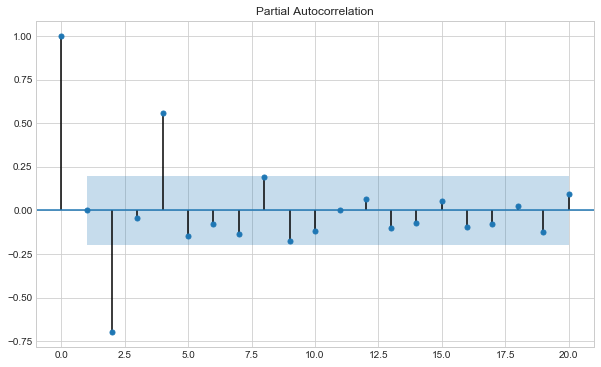

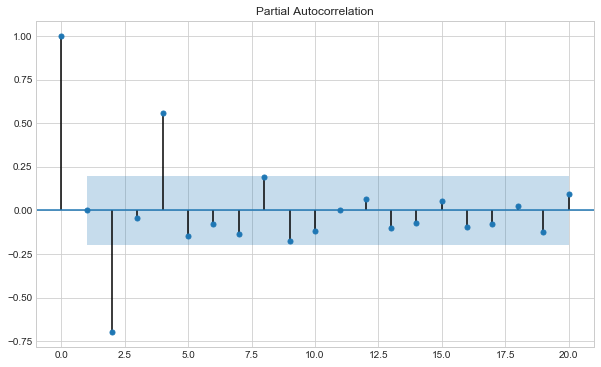

In [358]:
plot_pacf(indexdf,lags=20)

Dari plot pacf bisa menentukan nilai parameter P (autoregressive lags) pada model ARIMA. <br> 
Pada plot pacf di atas terlihat bahwa plot pacf cut off terakhir itu pada lag ke 4 sehingga <br>
nilai untuk parameter P adalah 4

In [359]:
from statsmodels.tsa.arima_model import ARIMA

## ARIMA MODEL
Pada model ini akan digunakan ARIMA(4,0,0) berdasarkan hasil dari plot ACF dan PACF di atas

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Plotting ARIMA model


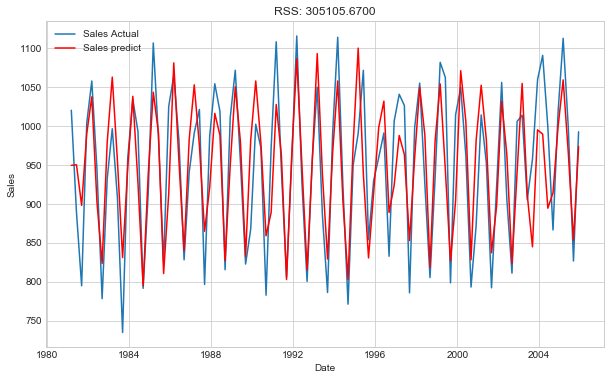

In [360]:
model = ARIMA(df, order=(4,0,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(df,label='Sales Actual')
plt.plot(results_AR.fittedvalues, color='red',label='Sales predict')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df["Sales"])**2))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
print('Plotting ARIMA model')

In [361]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 0)   Log Likelihood                -543.024
Method:                       css-mle   S.D. of innovations             54.311
Date:                Fri, 06 Sep 2019   AIC                           1098.048
Time:                        00:11:46   BIC                           1113.679
Sample:                    03-01-1981   HQIC                          1104.374
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         949.4899      7.980    118.978      0.000     933.849     965.131
ar.L1.Sales     0.0164      0.078      0.208      0.835      -0.137       0.170
ar.L2.Sales    -0.2741      0.076     -3.584    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


## Hasil prediksi ARIMA

In [362]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1981-03-01     949.489856
1981-06-01     950.225965
1981-09-01     898.070006
1981-12-01     990.241296
1982-03-01    1037.377835
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


##  Hasil plot forcasting dengan menggunakan ARIMA 
Berikut merupakan hasil prediksi untuk 3 periode data penjualan ke depannya

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


,Prediksi Sales Setiap 3 bulan untuk 3 periode ke depan
0,1083.122066
1,971.705711
2,836.945809
3,965.465087
4,1062.334047
5,962.807456
6,849.265187
7,951.825945
8,1046.125538


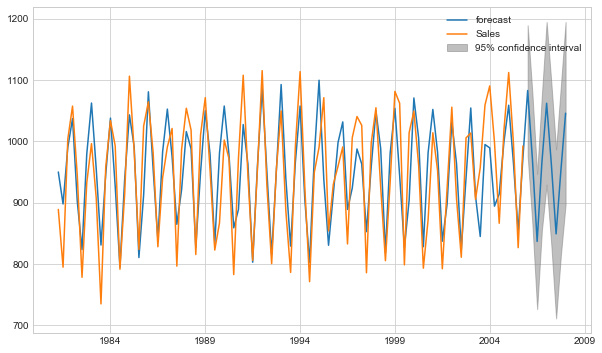

In [363]:
results_ARIMA.plot_predict(1,99+9)
hasil=results_ARIMA.forecast(steps=9)
prediksi=list(hasil[0])
pd.DataFrame(prediksi,columns=['Prediksi Sales Setiap 3 bulan untuk 3 periode ke depan'])

## Residual Error Plot
Berikut merupakan hasil plot dari residual atau error dari hasil prediksi model ARIMA

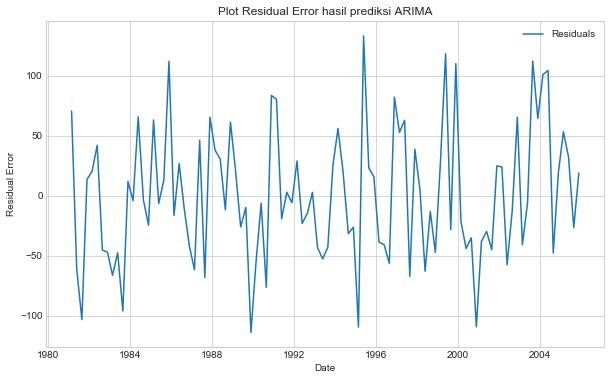

In [364]:
dummy=df.reset_index()
dummy2=predictions_ARIMA_diff.reset_index()
dummy2['Sales']=dummy2[0]
residuals=[dummy.loc[i,'Sales']-dummy2.loc[i,'Sales'] for i in range(len(dummy2))]
df['Residuals']=residuals
plt.plot(df['Residuals'],label='Residuals')
plt.title('Plot Residual Error hasil prediksi ARIMA')
plt.xlabel('Date')
plt.ylabel('Residual Error')
plt.legend()

## Plot Distribusi Residual Error
Jika dilihat dari plot distribusinya, rentang error paling banyak terjadi di rentang -50 s.d 60
dan rentang errornya berada di sekitar -110 s.d 135

Text(0.5,1,'Distribusi Residual Error')

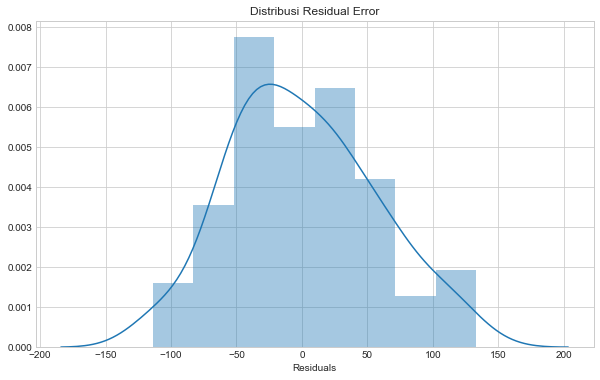

In [365]:
sns.set_style('whitegrid')
sns.distplot(df['Residuals'])
plt.title('Distribusi Residual Error')


In [366]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Evaluasi Model ARIMA
Untuk mengevaluasi model ARIMA akan dilihat dari nilai mean abosolute percentage (MAPE)

In [367]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print('MAPE = '+str(round(np.mean(np.abs((y_true - y_pred) / y_true)),4) * 100)+str('%'))
mean_absolute_percentage_error(df['Sales'],predictions_ARIMA_diff)

MAPE = 4.79%


Hasil MAPE sebesar 4.79% artinya bahwa error nilai hasil prediksi sebesar 4.79% jika dibandingkan dengan data yang sebenarnya.
